<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E3%82%B9%E3%83%83%E3%82%AD%E3%83%AA%E6%A9%9F%E6%A2%B0%E7%AC%AC15%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/Wholesale.csv')
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [2]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [3]:
df = df.drop(['Channel', 'Region'], axis = 1)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns=df.columns)

#fit_transformはfitとtransformを一緒に行ってくれるメソッド

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, random_state = 0)

# モデルに学習させる
model.fit(sc_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [6]:
model.labels_


array([2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,

In [7]:
sc_df['cluster'] = model.labels_
sc_df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0


In [8]:
sc_df.groupby('cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,-0.507313,0.585563,0.809716,-0.324183,0.804182,0.083148
1,1.129319,3.805151,3.371239,1.573779,3.287741,2.198588
2,0.126563,-0.372418,-0.431222,0.043124,-0.425596,-0.126350


<Axes: xlabel='cluster'>

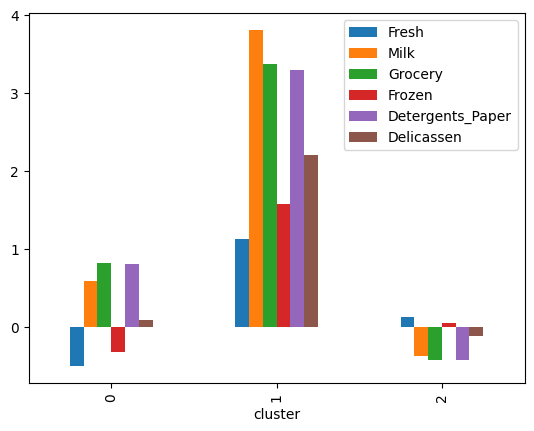

In [9]:
%matplotlib inline
cluster_mean = sc_df.groupby('cluster').mean()
cluster_mean.plot(kind = 'bar')

In [11]:
sse_list = []
# クラスタ数2～30でSSEを調べる
for n in range(2, 31):
    model = KMeans(n_clusters = n, random_state = 0, n_init=10)
    model.fit(sc_df)
    sse = model.inertia_ # SSEの計算
    sse_list.append(sse)
sse_list

[2043.7998084487576,
 1628.0214373385113,
 1324.1455794934304,
 1066.5186766661336,
 923.6883688142489,
 833.8007189892954,
 750.051528879998,
 669.7780011188454,
 619.9087831783501,
 573.211500042876,
 531.0043836375462,
 504.86405287607437,
 481.42935645618627,
 445.672353607593,
 414.2430234107047,
 392.562799969632,
 378.05249022740327,
 357.2243120820111,
 338.4736816718099,
 318.96015876817023,
 316.9124496604791,
 295.26984326838493,
 283.2102043727194,
 270.95923986755,
 258.25911592688436,
 246.0335166833364,
 237.25299428030425,
 227.20770107034343,
 224.9106039520325]

<Axes: >

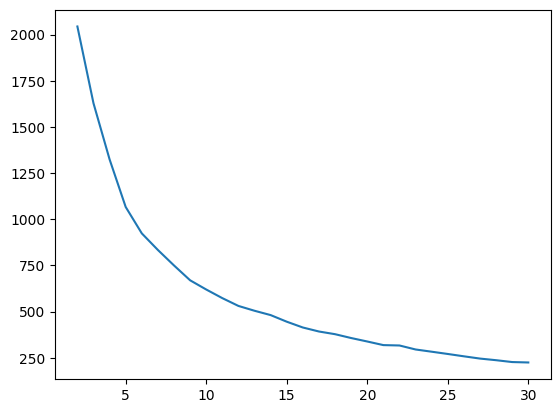

In [12]:
se = pd.Series(sse_list)
num = range(2, 31) # range関数で2～30の整数列を作る
se.index = num # シリーズのインデックスを変更
se.plot(kind = 'line')

In [14]:
model = KMeans(n_clusters = 5, random_state = 0, n_init=10)
model.fit(sc_df)
sc_df['cluster'] = model.labels_
sc_df.to_csv('clustered_Wholesale.csv', index = False)